Saving netflix_titles.csv to netflix_titles.csv
Dataset loaded successfully  ! First 5 Rows are :
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13   

/tmp/ipython-input-211289005.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_count.index, y=type_count.values, palette='Set1')


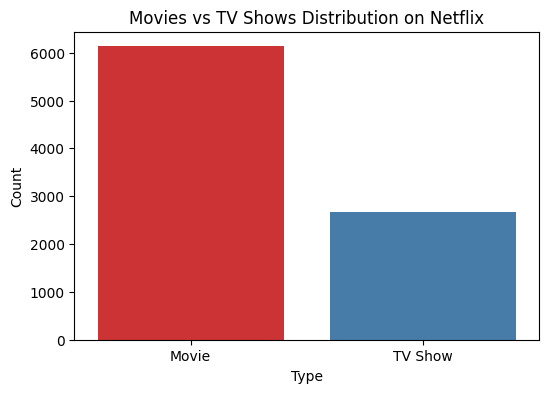

/tmp/ipython-input-211289005.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sum.index,y=sum.values,palette='Set3')


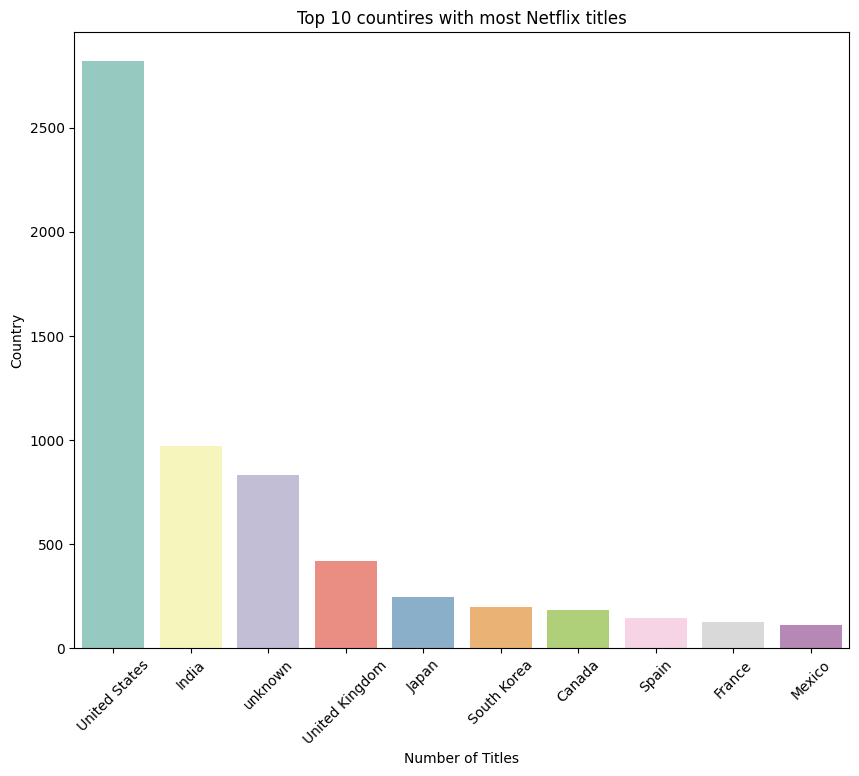

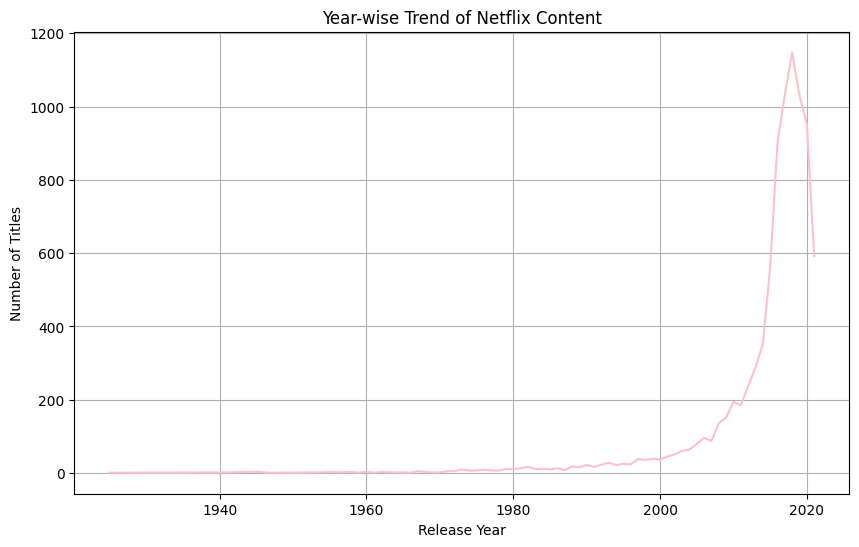

/tmp/ipython-input-211289005.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings.index,y=ratings.values,palette="muted")


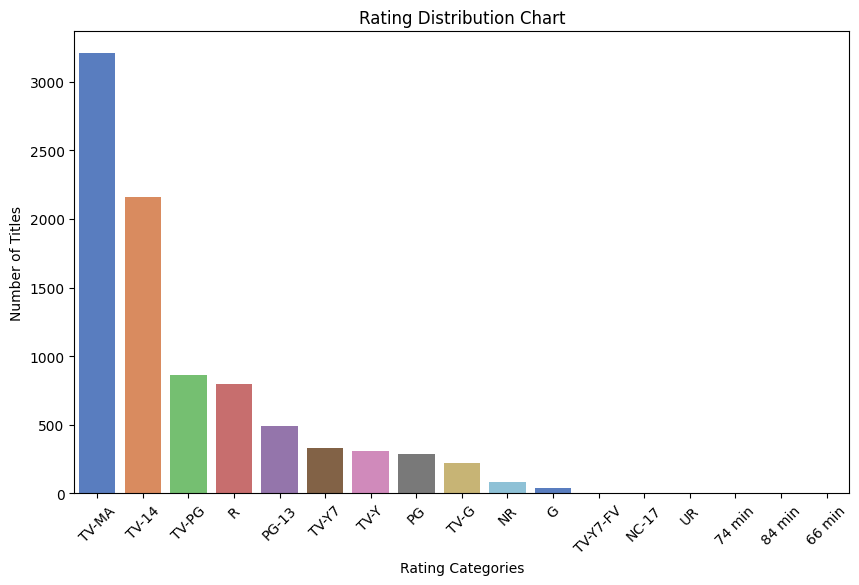

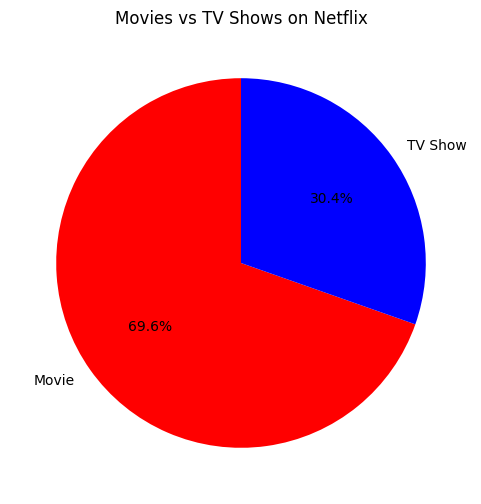

In [ ]:
#Netflix Data Analysis Project

#imported the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

#uploaded CSV FILE to /content/ folder of colab's cloud environment
uploaded = files.upload()

#loaded the CSV file to clean
df=pd.read_csv("/content/netflix_titles.csv")
print("Dataset loaded successfully  ! First 5 Rows are :")
print((df.head()))

#filled the NaN columns with "unknown" word
df['director']=df['director'].fillna("unknown")
df['cast']=df['cast'].fillna("unknown")
df['country']=df['country'].fillna("unknown")
df['date_added']=df['date_added'].fillna("01-01-2000")
print((df.head()))               # to see data after changing the NaN values from the data

#we can see the column names of the data
print(df.columns)

#to convert the format of date in the data for
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')

#  Extract duration type (Movies have minutes, TV Shows have seasons)
df['duration_type'] = df['duration'].astype(str).apply(lambda x: 'Seasons' if 'season' in x.lower() else 'Minutes')

# Movies vs TV Shows Distribution on Netflix
type_count=df['type'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=type_count.index, y=type_count.values, palette='Set1')
plt.title('Movies vs TV Shows Distribution on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Top 10 Countries with most Netflix Titles
sum=df['country'].value_counts().head(10)
plt.figure(figsize=(10,8))
sns.barplot(x=sum.index,y=sum.values,palette='Set3')
plt.title('Top 10 countires with most Netflix titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

# Year-wise Trend of Netflix Content
plt.figure(figsize=(10,6))
df['release_year'].value_counts().sort_index().plot(kind='line', color='pink')
plt.title("Year-wise Trend of Netflix Content")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

# Rating Distribution Chart
ratings=df['rating'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=ratings.index,y=ratings.values,palette="muted")
plt.title("Rating Distribution Chart")
plt.xlabel("Rating Categories")
plt.ylabel("Number of Titles")
plt.xticks(rotation =45)
plt.show()

# Movies vs TV Shows on Netflix
type_count=df['type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(type_count.values, labels=type_count.index, autopct='%1.1f%%',
        startangle=90, colors=['red','blue'])
plt.title("Movies vs TV Shows on Netflix")
plt.show()



